In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [477]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
s=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')


In [478]:
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [413]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [414]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [415]:
# Droping missing values in the columns
a=train.isnull().sum()
for i in a.index:
    if a[i]>1:
        train.drop([i],axis=1,inplace=True)
        test.drop([i],axis=1,inplace=True)

In [416]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [419]:
b=train.corrwith(train['SalePrice']).abs().sort_values(ascending=False)
for i in b.index:
    if b[i]<0.2:
        train.drop([i],axis=1,inplace=True)
        if i in test.columns:
            test.drop([i],axis=1,inplace=True)
        else:
            continue

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

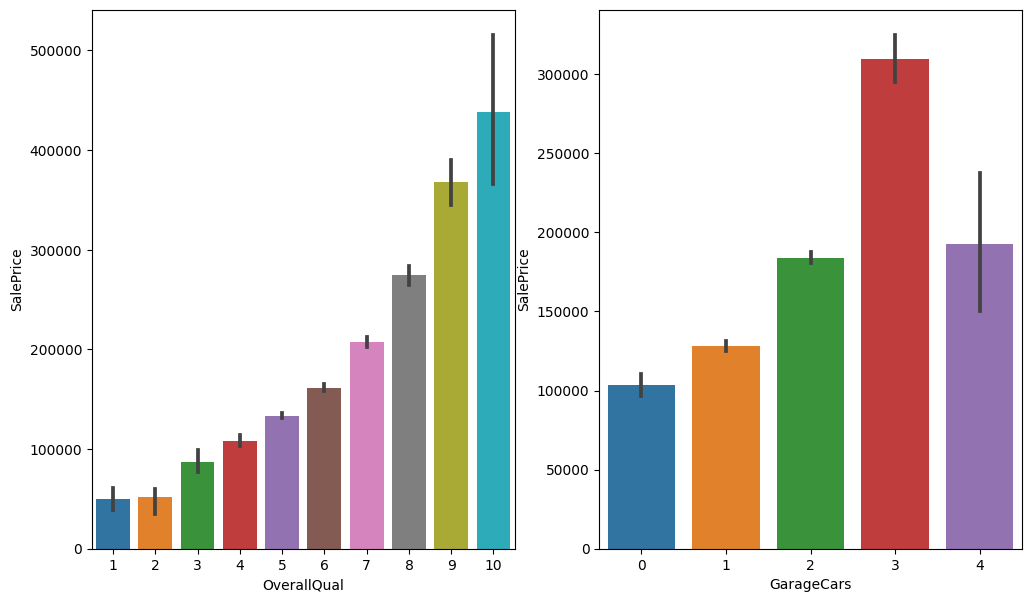

In [420]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
sns.barplot(train,x='OverallQual',y='SalePrice',ax=ax[0])
sns.barplot(train,x='GarageCars',y='SalePrice',ax=ax[1])

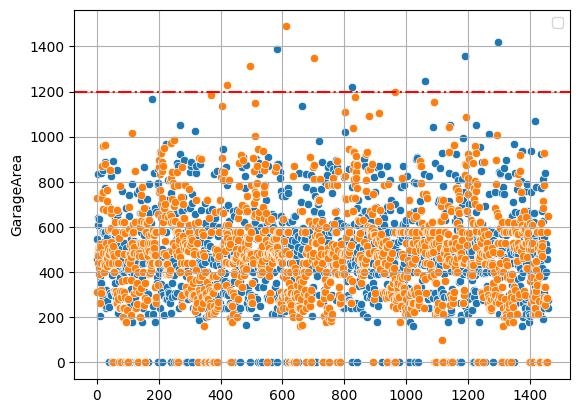

In [422]:
sns.scatterplot(train,x=train.index,y='GarageArea')
sns.scatterplot(test,x=test.index,y='GarageArea')
plt.legend()
plt.grid()
plt.axhline(y=1200,color='red',linestyle='-.')

In [423]:
train=train[train['GarageArea']<1200]
test=test[test['GarageArea']<1200]


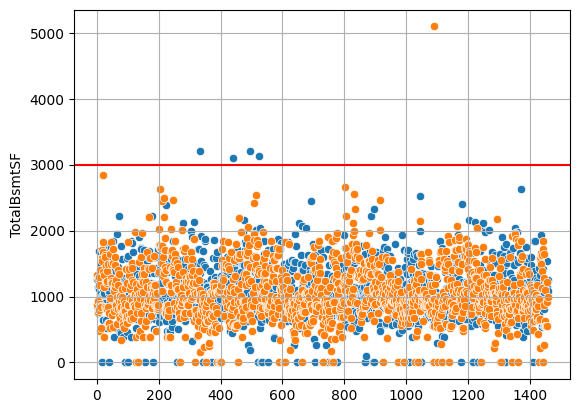

In [424]:
sns.scatterplot(train,x=train.index,y='TotalBsmtSF')
sns.scatterplot(test,x=test.index,y='TotalBsmtSF')

plt.axhline(y=3000,color='red')
plt.grid()

In [425]:
train=train[train['TotalBsmtSF']<3000]

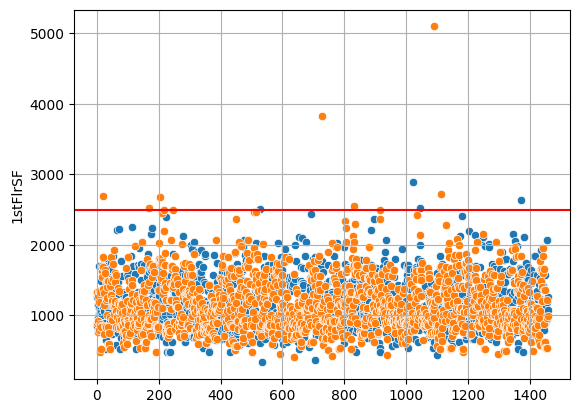

In [427]:
sns.scatterplot(train,x=train.index,y='1stFlrSF')
sns.scatterplot(test,x=test.index,y='1stFlrSF')

plt.grid()
plt.axhline(y=2500,color='red')

In [428]:
train=train[train['1stFlrSF']<2500]
test=test[test['1stFlrSF']<2500]

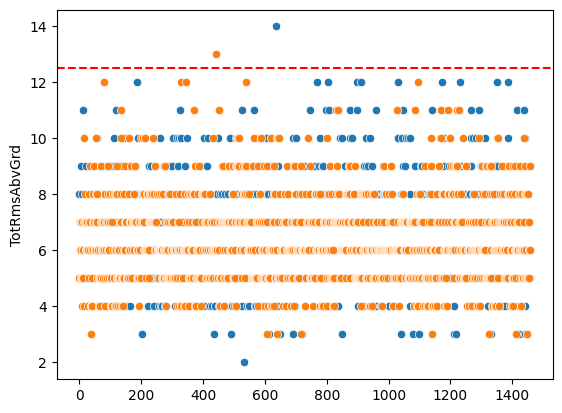

In [431]:
sns.scatterplot(train,x=train.index,y='TotRmsAbvGrd')
sns.scatterplot(test,x=test.index,y='TotRmsAbvGrd')
plt.axhline(y=12.5,color='red',linestyle='--')
plt.show()

In [432]:
train=train[train['TotRmsAbvGrd']<12.5]
test=test[test['TotRmsAbvGrd']<12.5]


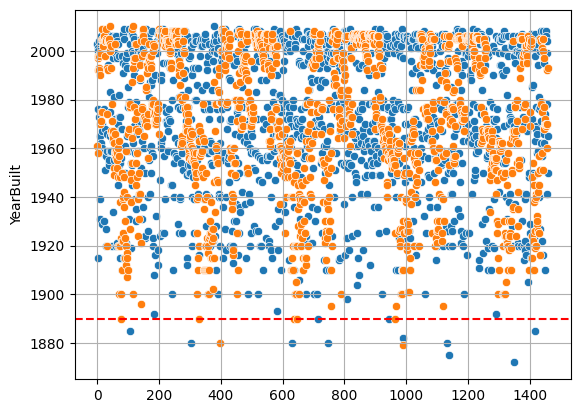

In [433]:
sns.scatterplot(train,x=train.index,y='YearBuilt')
sns.scatterplot(test,x=test.index,y='YearBuilt')

plt.axhline(y=1890,color='red',linestyle='--')
plt.grid()


In [463]:
# train=train[train['YearBuilt']>1890]
test=test[test['YearBuilt']>1897]

In [435]:
c=train.corrwith(train['SalePrice']).abs().sort_values(ascending=False)
c

SalePrice                1.000000
OverallQual              0.794346
GrLivArea                0.743390
GarageCars               0.646624
GarageArea               0.642432
TotalBsmtSF              0.638903
1stFlrSF                 0.622494
ExterQual_TA             0.589921
FullBath                 0.563228
TotRmsAbvGrd             0.541551
YearBuilt                0.536205
KitchenQual_TA           0.518319
YearRemodAdd             0.509751
KitchenQual_Ex           0.505593
Foundation_PConc         0.499011
Fireplaces               0.462243
ExterQual_Gd             0.461774
ExterQual_Ex             0.445597
HeatingQC_Ex             0.434407
BsmtFinSF1               0.396387
Neighborhood_NridgHt     0.394231
SaleType_New             0.366497
SaleCondition_Partial    0.360821
Foundation_CBlock        0.344144
2ndFlrSF                 0.340595
KitchenQual_Gd           0.326545
WoodDeckSF               0.323939
OpenPorchSF              0.322341
Neighborhood_NoRidge     0.319104
HeatingQC_TA  

<Axes: >

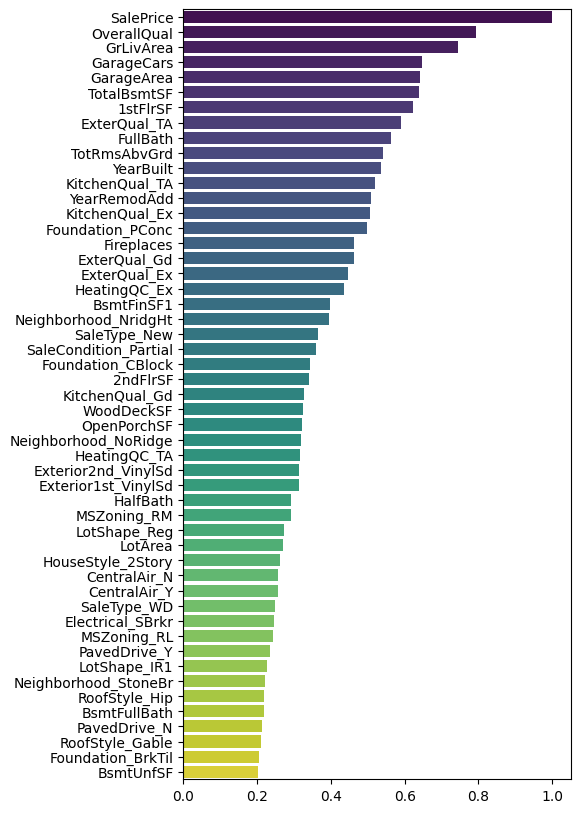

In [436]:
plt.figure(figsize=(5,10))
sns.barplot(x=c.values,y=c.index,palette='viridis')

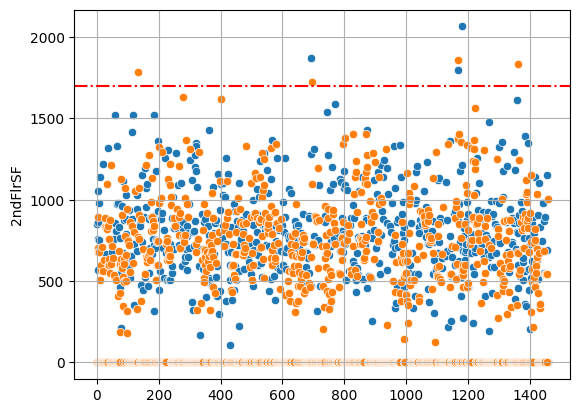

In [437]:
sns.scatterplot(train,x=train.index,y='2ndFlrSF')
sns.scatterplot(test,x=test.index,y='2ndFlrSF')

plt.grid()
plt.axhline(y=1700,color='red',linestyle='-.')

In [461]:
# train=train[train['2ndFlrSF']<1700]
test=test[test['2ndFlrSF']<1500]

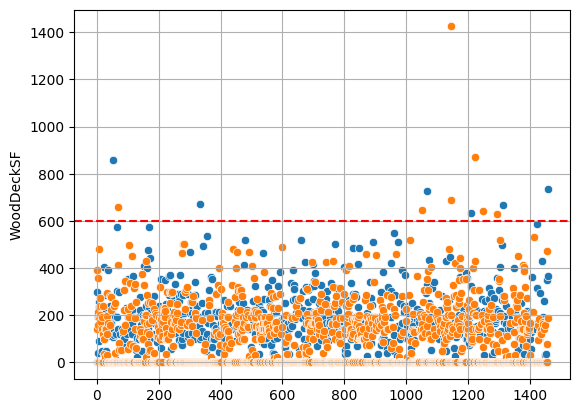

In [440]:
sns.scatterplot(train,x=train.index,y='WoodDeckSF')
sns.scatterplot(test,x=test.index,y='WoodDeckSF')
plt.axhline(y=600,color='red',linestyle='--')
plt.grid()

In [441]:
train=train[train['WoodDeckSF']<600]
test=test[test['WoodDeckSF']<600]

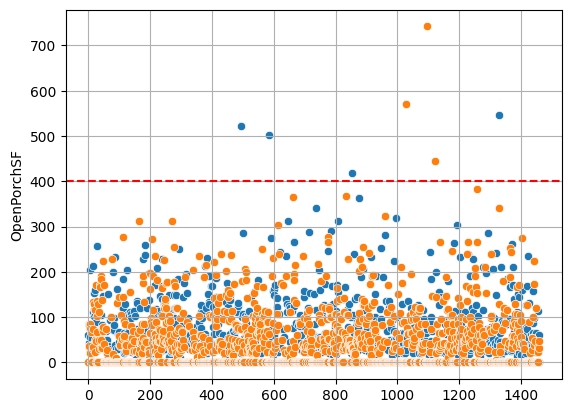

In [443]:
sns.scatterplot(train,x=train.index,y='OpenPorchSF')
sns.scatterplot(test,x=test.index,y='OpenPorchSF')
plt.axhline(y=400,color='red',linestyle='--')
plt.grid()

In [459]:
# train=train[train['OpenPorchSF']<400]
test=test[test['OpenPorchSF']<350]


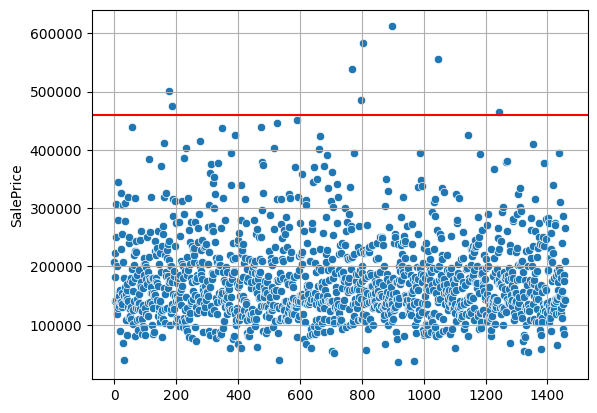

In [446]:
sns.scatterplot(train,x=train.index,y='SalePrice')

plt.axhline(y=460000,color='red')
plt.grid()

In [447]:
train=train[train['SalePrice']<465000]

In [448]:
test.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,CentralAir_Y,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial
0,11622,5,1961,1961,468.0,270.0,882.0,896,0,896,...,True,True,False,False,True,False,True,False,True,False
1,14267,6,1958,1958,923.0,406.0,1329.0,1329,0,1329,...,True,True,False,True,False,False,True,False,True,False
2,13830,5,1997,1998,791.0,137.0,928.0,928,701,1629,...,True,True,False,False,True,False,True,False,True,False
3,9978,6,1998,1998,602.0,324.0,926.0,926,678,1604,...,True,True,False,True,False,False,True,False,True,False
4,5005,8,1992,1992,263.0,1017.0,1280.0,1280,0,1280,...,True,True,False,True,False,False,True,False,True,False


In [450]:
x=train.drop('SalePrice',axis=1)
y=train[['SalePrice']]

In [451]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [452]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=42)

In [453]:
rf=RandomForestRegressor()
rf.fit(xtr,ytr)
print(mean_absolute_error(yte,rf.predict(xte)))
print(np.sqrt(mean_squared_error(yte,rf.predict(xte))))

/tmp/ipykernel_33/1516154945.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)


15854.04785630153
22217.036607350547


In [454]:
trr=DecisionTreeRegressor()
trr.fit(xtr,ytr)
print(mean_absolute_error(yte,trr.predict(xte)))
print(np.sqrt(mean_squared_error(yte,trr.predict(xte))))

22010.558303886926
31746.529076019608


In [455]:
lr=LinearRegression()
lr.fit(xtr,ytr)
print(mean_absolute_error(yte,lr.predict(xte)))
print(np.sqrt(mean_squared_error(yte,lr.predict(xte))))

16886.75961041195
23141.14728395856


In [456]:
xgb=XGBRegressor()
xgb.fit(xtr,ytr)
print(mean_absolute_error(yte,xgb.predict(xte)))
print(np.sqrt(mean_squared_error(yte,xgb.predict(xte))))

17934.490917623676
25437.549940232853


In [467]:
test.dropna(inplace=True)

In [474]:
xgb=XGBRegressor()
xgb.fit(x,y)
pred=xgb.predict(test)

In [479]:
s.to_csv('submis',index=False)